In [1]:
import docker, os

a = %pwd
wd = (a.rsplit('/',2))[0]

GENE = "ITGAL"
BLAST_Results=os.path.join("homologue", GENE, "B20210131A94466D2655679D1FD8953E075198DA8030E49B.fasta")


D_CLUSTAL_O='quay.io/biocontainers/clustalo:1.2.4--1'

WORK_HOST_DIRECTORY=wd
WORK_CONT_DIRECTORY='/opt/project'


In [2]:
client = docker.from_env()
bwa_docker_cont = client.containers.run(
    image=D_CLUSTAL_O,
    volumes={WORK_HOST_DIRECTORY: {'bind': WORK_CONT_DIRECTORY,'mode': 'rw'}},
    working_dir= WORK_CONT_DIRECTORY+'/data/multi_align/',
    entrypoint="bash",
    command='{0}/scripts_bash/clustalo.sh {1} {2}'.format(WORK_CONT_DIRECTORY, BLAST_Results, GENE))


In [3]:
from Bio import SeqIO, AlignIO, Phylo

alin_fa = AlignIO.read(os.path.join(wd,"data/multi_align", GENE, f"{GENE}_clustalo.fasta"), "fasta")

print(alin_fa)

Alignment with 13 rows and 1297 columns
MK-DSCITVMAM---ALLSGFFFFAPASSYNLDVRGARSFSPPR...GKD sp|P20701|ITAL_HUMAN
-M-NSCIIVLR----LLLSGPFVFAPAWSYNLDVRHVQNFSFPL...GD- sp|P61625|ITAL_BOVIN
---MSFRIAGPR---LLLLGLQLFAKAWSYNLDTRPTQSFL-AQ...--- sp|P24063|ITAL_MOUSE
----------MA---LRVLLLTALTLCHGFNLDTENAMTFQ--E...--- sp|P11215|ITAM_HUMAN
----------MT---LKALLVTALALCHGFNLDTEHPMTFQ--E...--- sp|P05555|ITAM_MOUSE
-------MSCTW---IAFLLLLGFVSCLGFNLDAEKLTHFH--M...--- sp|Q9QXH4|ITAX_MOUSE
-------MTRTR---AALLLFTALATSLGFNLDTEELTAFR--V...--- sp|P20702|ITAX_HUMAN
-------MAGGV---VILLCGWVLASCHGSNLDVEEPIVFR--E...--- sp|Q9QYE7|ITAD_RAT
MVFKTIWIERYR---KLINLFRALASCHGSNLDVEKPVVFK--E...--- sp|Q3V0T4|ITAD_MOUSE
MTF------------GTVLLLSVLASYHGFNLDVEEPTIFQ--E...--- sp|Q13349|ITAD_HUMAN
-------MDLPRGLVVAWALSLWPGFTDTFNMDTRKPRVIP-GS...--- sp|Q9UKX5|ITA11_HUMAN
-------MELPFVTHLFLPLVFLTGLCSPFNLDEHHPRLFP-GP...--- sp|O75578|ITA10_HUMAN
-------MDFPRGLLVAWTLSLWPGFTDTFNMDTRNPRVIA-GP...--- sp|P61622|ITA11_MOUSE


Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.0672477)
            Clade(branch_length=0.330763, name='sp|O75578|ITA10_HUMAN')
            Clade(branch_length=0.28152)
                Clade(branch_length=0.0492424, name='sp|Q9UKX5|ITA11_HUMAN')
                Clade(branch_length=0.0492424, name='sp|P61622|ITA11_MOUSE')
        Clade(branch_length=0.0289287)
            Clade(branch_length=0.21302)
                Clade(branch_length=0.156062, name='sp|P24063|ITAL_MOUSE')
                Clade(branch_length=0.0393237)
                    Clade(branch_length=0.116738, name='sp|P20701|ITAL_HUMAN')
                    Clade(branch_length=0.116738, name='sp|P61625|ITAL_BOVIN')
            Clade(branch_length=0.147556)
                Clade(branch_length=0.093488)
                    Clade(branch_length=0.128038, name='sp|P11215|ITAM_HUMAN')
                    Clade(branch_length=0.128038, name='sp|P05555|ITAM_MOUSE')
                Clade(branch_length=0.0287716

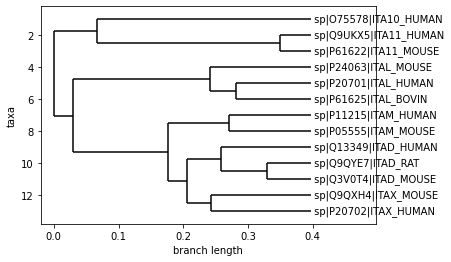

In [5]:
from Bio import Phylo
tree = Phylo.read(os.path.join(wd,"data/multi_align", GENE, f"{GENE}_clustalo.dnd"), "newick")
Phylo.draw(tree)